In [97]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [98]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

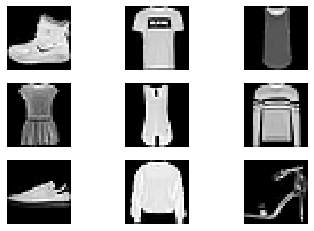

In [99]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k], cmap="gray")
    plt.axis('off')
plt.show()

In [4]:
# Remove 5,000 images from X_train to use as validation
# Convert ints to floats
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [316]:
# Train fully-connected neural network
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    my_dense_layer(400),
    my_dense_layer(400),
    my_dense_layer(300),
    #my_dense_layer(100),
    my_dense_layer(100),
    my_dense_layer(10, activation="softmax")
])

In [317]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [318]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 12s 219us/sample - loss: 0.6038 - accuracy: 0.8174 - val_loss: 0.4998 - val_accuracy: 0.8584
Epoch 2/5
55000/55000 [==============================] - 11s 204us/sample - loss: 0.4678 - accuracy: 0.8606 - val_loss: 0.4428 - val_accuracy: 0.8702
Epoch 3/5
55000/55000 [==============================] - 11s 204us/sample - loss: 0.4280 - accuracy: 0.8702 - val_loss: 0.4113 - val_accuracy: 0.8774
Epoch 4/5
55000/55000 [==============================] - 11s 205us/sample - loss: 0.4019 - accuracy: 0.8777 - val_loss: 0.4105 - val_accuracy: 0.8754
Epoch 5/5
55000/55000 [==============================] - 12s 210us/sample - loss: 0.3854 - accuracy: 0.8825 - val_loss: 0.3985 - val_accuracy: 0.8804


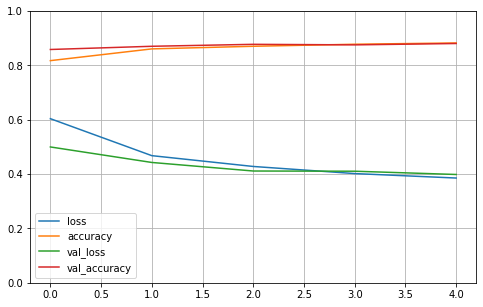

In [319]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
#plt.savefig('part1_train4', bbox_inches='tight')
plt.show()

In [320]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4709   10   42  215   18    0  469    0   80    0]
 [   0 5344    1   86    6    0    4    0    2    1]
 [  34   14 3805   39  974    0  604    0   26    0]
 [  63   23   22 5083  207    0   78    0   23    0]
 [   3   12  161  120 4791    0  390    0   35    0]
 [   0    0    1    0    0 5330    0  120   22   34]
 [ 697   13  239  144  328    0 4023    0   63    0]
 [   0    0    0    0    0   46    0 5373    8   61]
 [   1    4   10    9   11    0   44   15 5415    1]
 [   0    1    0    0    0   25    0  338    2 5128]]


In [321]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 87us/sample - loss: 0.4341 - accuracy: 0.8683


[0.434060502910614, 0.8683]

In [322]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[809   4   7  41   4   2 115   0  18   0]
 [  0 973   0  22   3   0   2   0   0   0]
 [ 15   3 655  12 200   1 111   0   3   0]
 [ 14  10   8 892  39   0  26   0  11   0]
 [  0   1  39  30 851   0  73   0   6   0]
 [  0   0   0   1   0 952   0  30   4  13]
 [123   4  65  38  72   0 676   0  22   0]
 [  0   0   0   0   0  15   0 974   1  10]
 [  0   0   4   3   3   1   9   4 976   0]
 [  0   0   0   0   0  10   1  64   0 925]]


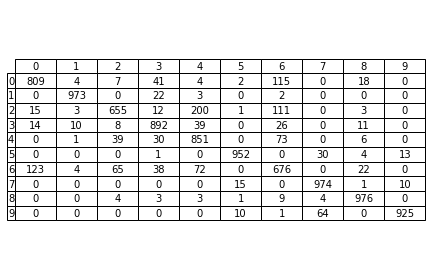

In [323]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
#plt.savefig('conf_test1.pdf')

In [100]:
# Remove 5,000 images from X_train to use as validation
# Convert ints to floats
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Train Convolutional Neural Network
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="elu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="elu", padding="valid")

model = tf.keras.models.Sequential([
    my_conv_layer(10,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(4, strides=(2,2)),
    my_conv_layer(32,5,padding="same"),
    tf.keras.layers.MaxPooling2D(4, strides=(2,2)),
    my_conv_layer(120,5),
    tf.keras.layers.Flatten(),
    my_dense_layer(64),
    my_dense_layer(10, activation="softmax")
])

In [101]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

In [102]:
history = model.fit(X_train, y_train, epochs=4, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/4
55000/55000 [==============================] - 31s 569us/sample - loss: 0.4554 - accuracy: 0.8348 - val_loss: 0.3270 - val_accuracy: 0.8762
Epoch 2/4
55000/55000 [==============================] - 33s 592us/sample - loss: 0.3108 - accuracy: 0.8885 - val_loss: 0.2854 - val_accuracy: 0.9018
Epoch 3/4
55000/55000 [==============================] - 33s 604us/sample - loss: 0.2739 - accuracy: 0.9021 - val_loss: 0.2658 - val_accuracy: 0.9042
Epoch 4/4
55000/55000 [==============================] - 32s 587us/sample - loss: 0.2490 - accuracy: 0.9114 - val_loss: 0.2528 - val_accuracy: 0.9102


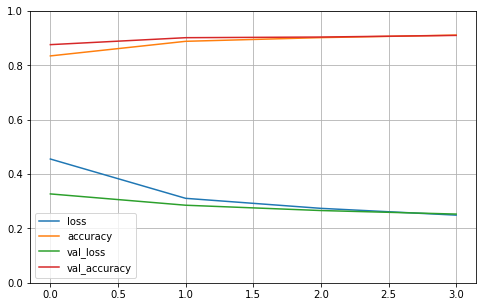

In [103]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.savefig('part2_train2', bbox_inches='tight')
plt.show()

In [104]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4992    4   63   39    5    0  432    0    8    0]
 [   6 5410    1   19    3    0    2    0    3    0]
 [  77    4 4950   30  224    0  209    0    2    0]
 [ 173   93   10 4960  110    0  149    0    4    0]
 [   8    7  360  119 4696    0  319    0    3    0]
 [   4    1    0    0    0 5422    1   46    5   28]
 [ 518   10  337   62  234    0 4338    0    8    0]
 [   0    0    0    0    0   41    0 5369    1   77]
 [  10    0    6    9    3    0   17    2 5463    0]
 [   1    0    0    0    0    9    0  160    0 5324]]


In [105]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 161us/sample - loss: 0.2721 - accuracy: 0.9033


[0.27209446003437043, 0.9033]

In [106]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[870   0  13  12   2   1  97   0   4   1]
 [  3 985   0   6   0   0   3   0   3   0]
 [ 16   1 890   7  41   0  45   0   0   0]
 [ 42  19   8 876  23   0  31   0   1   0]
 [  3   0  88  28 827   0  53   0   1   0]
 [  2   0   0   0   0 974   0  16   2   6]
 [124   1  84  22  71   0 693   0   5   0]
 [  0   0   0   0   0  11   0 976   1  12]
 [  5   0   1   3   2   1   0   1 987   0]
 [  0   0   0   0   0   4   1  40   0 955]]


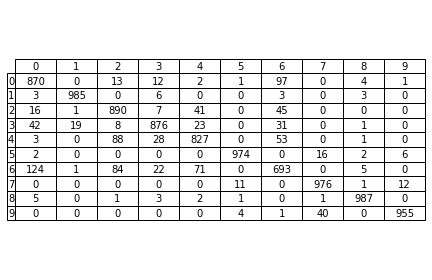

In [107]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

# create table and save to file
df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_test2.pdf')